**About this challenge**

To assess the impact of climate change on Earth's flora and fauna, it is vital to quantify how human activities such as logging, mining, and agriculture are impacting our protected natural areas. Researchers in Mexico have created the VIGIA project, which aims to build a system for autonomous surveillance of protected areas. A first step in such an effort is the ability to recognize the vegetation inside the protected areas. In this competition, you are tasked with creation of an algorithm that can identify a specific type of cactus in aerial imagery.

In this kernel we will be trying to solve this challenge using CNN through **fast.ai library**

![Fastailogo](https://images.ctfassets.net/orgovvkppcys/5EShj6ZsQFERrNd/af53baa732ce18025c51c9268ffd037b/image.png?w=648&q=100)

**Loading necessary libraries**

In [1]:
from fastai.vision import *
from fastai import *
import os
import pandas as pd
import numpy as np
print(os.listdir("../input/"))

['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
train_dir="../input/train/train"
test_dir="../input/test/test"
train = pd.read_csv('../input/train.csv')
test = pd.read_csv("../input/sample_submission.csv")
data_folder = Path("../input")


**Analysing the given data**

In [3]:
train.head(5)


,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [4]:
train.describe()

,has_cactus
count,17500.000000
mean,0.750629
std,0.432662
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


**Getting the Data. **
[reference](https://docs.fast.ai/vision.data.html)

In [5]:
test_img = ImageList.from_df(test, path=data_folder/'test', folder='test')
# Applying Data augmentation
trfm = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
train_img = (ImageList.from_df(train, path=data_folder/'train', folder='train')
        .split_by_rand_pct(0.01)
        .label_from_df()
        .add_test(test_img)
        .transform(trfm, size=128)
        .databunch(path='.', bs=64, device= torch.device('cuda:0'))
        .normalize(imagenet_stats)
       )

**Training the data using appropriate model. We have used [densenet](https://pytorch.org/docs/stable/torchvision/models.html) here**

In [6]:
learn = cnn_learner(train_img, models.densenet161, metrics=[error_rate, accuracy])


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
115730790it [00:01, 99358993.39it/s]


**Finding the suitable learning rate**

In [7]:
learn.lr_find()



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


**Plotting the Learning Rate**

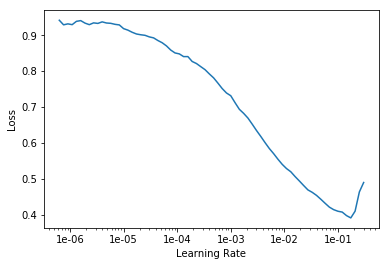

In [8]:
learn.recorder.plot()

**Now training the data based on suitable learning rate**

In [9]:
lr = 1e-02
learn.fit_one_cycle(3, slice(lr))



epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.046528,0.001797,0.000000,1.000000,01:13
1,0.022480,0.014306,0.005714,0.994286,01:10
2,0.009688,0.007852,0.005714,0.994286,01:08


In [10]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)

In [11]:
test.has_cactus = preds.numpy()[:, 0]

In [12]:
test.to_csv('submission.csv', index=False)

**References**
* https://docs.fast.ai/
* https://www.kaggle.com/kenseitrg/simple-fastai-exercise
* https://www.kaggle.com/shahules/getting-started-with-cnn-and-vgg16
